In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import savReaderWriter
import seaborn as sns
#import fiona
import geopandas as gdp
import descartes
from scipy import stats
import scipy.stats as scs
from scipy.stats import chisquare

%matplotlib inline
datasets = []

In [2]:
#Read in N8 dataset, cleaning the column names

with savReaderWriter.SavReader('data/N8Final/n8.sav') as reader:
    N8 = pd.DataFrame(reader.all(), columns = [str(s) for s in reader.header])

N8.columns=N8.columns.str.replace("'", '')
N8.columns=N8.columns.str[1:]
datasets.append([N8, 'N8'])

In [3]:
#Read in N9 dataset, cleaning the column names

with savReaderWriter.SavReader('data/N9/N9.SAV') as reader:
    N9 = pd.DataFrame(reader.all(), columns = [str(s) for s in reader.header])
    
N9.columns=N9.columns.str.replace("'", '')
N9.columns=N9.columns.str[1:]
datasets.append([N9, 'N9'])

In [4]:
#Read in N10 dataset, cleaning the column names

with savReaderWriter.SavReader('data/N10/n10.sav') as reader:
    N10 = pd.DataFrame(reader.all(), columns = [str(s) for s in reader.header])
    
N10.columns=N10.columns.str.replace("'", '')
N10.columns=N10.columns.str[1:]
datasets.append([N10, 'N10'])

In [5]:
#Read in N11 dataset, cleaning the column names

with savReaderWriter.SavReader('data/N11/n11.sav') as reader:
    N11 = pd.DataFrame(reader.all(), columns = [str(s) for s in reader.header])
 
N11.columns=N11.columns.str.replace("'", '')
N11.columns=N11.columns.str[1:]
datasets.append([N11, 'N11'])

In [6]:
#Read in N12 dataset, cleaning the column names

with savReaderWriter.SavReader('data/N12/n12.sav') as reader:
    N12 = pd.DataFrame(reader.all(), columns = [str(s) for s in reader.header])

N12.columns=N12.columns.str.replace("'", '')
N12.columns=N12.columns.str[1:]
datasets.append([N12, 'N12'])

In [7]:
#create dictionaries for columns which have consistent values across all datasets
ethnicity_dict = {1:'Asian', 2:'Black', 3:'Black/Hispanic', 4:'White', 5:'White/Hispanic', 6:'American Indain', 7:'Pacific Islander', 9:'Mixed', 10:'Mixed', 11:'Native American', 18:'Hispanic'}
age_dict = {1:19, 2:22, 3:27, 4:32, 5:37, 6:42, 7:47, 8:52, 9:57, 10:62, 11:67, 12:72, 13:'75+'}
work_dict = {1:'Full Time', 2:'Part Time', 3:'Temporary Leave', 4:'Unemployed', 5:'Unemployed', 6:'Student', 7:'Retired', 8:'Homemaker', 9:'Disabled', 10:'Never Worked', 11:'Self Employed', 12:'Volunteer Work'}

#functions to clean and return each individual dataset formatted in exactly the same way
#with the exact same columns
def clean_N12(N12):
    state_dict_N12 = {-8: 'Unknown', 1: 'Alabama', 2: 'Alaska', 3:'American Somoa', 4:'Arizona', 5:'Arkansas', 6:'California', 7:'Colorado', 8:'Connecticut', 9:'Deleware', 10:'District of Columbia', 11:'Florida', 12:'Georgia', 13:'Guam', 14:'Hawaii', 15:'Idaho', 16:'Illinois', 17:'Indiana', 18:'Iowa', 19:'Kansas', 20:'Kentucky', 21:'Louisiana', 22:'Maine', 23:'Maryland', 24:'Massachusetts', 25:'Michigan', 26:'Minnesota', 27:'Mississippi', 28:'Missouri', 29:'Montana', 30:'Nebraska', 31:'Nevada', 32:'New Hampshire', 33:'New Jersey', 34:'New Mexico', 35:'New York', 36:'North Carolina', 37:'North Dakota', 38:'Northern Mariana Islands', 39:'Ohio', 40:'Oklahoma', 41:'Oregon', 42:'Pennsylvania', 43:'Peurto Rico', 44:'Rhode Island', 45:'South Carolina', 46:'South Dakota', 47:'Tennessee', 48:'Texas', 49:'Utah', 50:'Vermont', 51:'Virginia', 52:'Virgin Islands', 53:'Washington', 54:'West Virginia', 55:'Wisconsin', 56:'Wyoming', 95:'Unknown', 97:'Unknown', 99:'Unknown'}
    cleaned_N12 = N12[['a1', 'age1', 'mqa2', 'a4', 'a12', 'a17', 'a18c', 'b1c', 'b2c', 'b3c', 'b4c', 'b5']]
    cleaned_N12.columns = ['Gender', 'Age', 'State', 'Ethnicity', 'Education', 'Work Situation', 'Household Income', 'Wine Frequency', 'Beer Frequency', 'Liquor Frequency', 'Average Drinking', 'Current Drinker']
    cleaned_N12.insert(loc=0, column='Dataset', value='N12')
    cleaned_N12.loc[:,'State'] = cleaned_N12['State'].map(lambda x:state_dict_N12[x])
    cleaned_N12.loc[:,'Gender'] = cleaned_N12['Gender'].map(lambda x:'M' if x == 1 else 'F')
    cleaned_N12.loc[:,'Ethnicity'] = cleaned_N12['Ethnicity'].map(lambda x: ethnicity_dict[x] if x in ethnicity_dict.keys() else 'Unknown')
    cleaned_N12.loc[:,'Age'] = cleaned_N12['Age'].map(lambda x:age_dict[x] if x in age_dict.keys() else 'Unknown')
    cleaned_N12.loc[:,'Work Situation'] = cleaned_N12['Work Situation'].map(lambda x:work_dict[x] if x in work_dict.keys() else 'Unknown')
    return cleaned_N12

def clean_N11(N11):
    state_dict_N11 = {-8: 'Unknown', 1: 'Alabama', 2: 'Alaska', 3:'American Somoa', 4:'Arizona', 5:'Arkansas', 6:'California', 7:'Colorado', 8:'Connecticut', 9:'Deleware', 10:'District of Columbia', 11:'Florida', 12:'Georgia', 13:'Guam', 14:'Hawaii', 15:'Idaho', 16:'Illinois', 17:'Indiana', 18:'Iowa', 19:'Kansas', 20:'Kentucky', 21:'Louisiana', 22:'Maine', 23:'Maryland', 24:'Massachusetts', 25:'Michigan', 26:'Minnesota', 27:'Mississippi', 28:'Missouri', 29:'Montana', 30:'Nebraska', 31:'Nevada', 32:'New Hampshire', 33:'New Jersey', 34:'New Mexico', 35:'New York', 36:'North Carolina', 37:'North Dakota', 38:'Northern Mariana Islands', 39:'Ohio', 40:'Oklahoma', 41:'Oregon', 42:'Pennsylvania', 43:'Peurto Rico', 44:'Rhode Island', 45:'South Carolina', 46:'South Dakota', 47:'Tennessee', 48:'Texas', 49:'Utah', 50:'Vermont', 51:'Virgin Islands', 52:'Virginia', 53:'Washington', 54:'West Virginia', 55:'Wisconsin', 56:'Wyoming', 95:'Unknown', 97:'Unknown', 99:'Unknown'}
    cleaned_N11 = N11[['qa1', 'age1', 'mqa2', 'qa4', 'qa12', 'qa17', 'qa18', 'qb1', 'qb2', 'qb3', 'qb4', 'qb5']]
    cleaned_N11.columns = ['Gender', 'Age', 'State', 'Ethnicity', 'Education', 'Work Situation', 'Household Income', 'Wine Frequency', 'Beer Frequency', 'Liquor Frequency', 'Average Drinking', 'Current Drinker']
    cleaned_N11.insert(loc=0, column='Dataset', value='N11')
    cleaned_N11.loc[:,'State'] = cleaned_N11['State'].map(lambda x:state_dict_N11[x] if x in state_dict_N11.keys() else 'Unknown')
    cleaned_N11.loc[:,'Gender'] = cleaned_N11['Gender'].map(lambda x:'M' if x == 1 else 'F')
    cleaned_N11.loc[:,'Ethnicity'] = cleaned_N11['Ethnicity'].map(lambda x: ethnicity_dict[x] if x in ethnicity_dict.keys() else 'Unknown')
    cleaned_N11.loc[:,'Age'] = cleaned_N11['Age'].map(lambda x:age_dict[x] if x in age_dict.keys() else 'Unknown')
    cleaned_N11.loc[:,'Work Situation'] = cleaned_N11['Work Situation'].map(lambda x:work_dict[x] if x in work_dict.keys() else 'Unknown')
    return cleaned_N11

def clean_N10(N10):
    state_dict_N10 = {-8: 'Unknown', 1: 'Alabama', 2: 'Alaska', 4:'Arizona', 5:'Arkansas', 6:'California', 8:'Colorado', 9:'Connecticut', 10:'Deleware', 11:'District of Columbia', 12:'Florida', 13:'Georgia', 15:'Hawaii', 16:'Idaho', 17:'Illinois', 18:'Indiana', 19:'Iowa', 20:'Kansas', 21:'Kentucky', 22:'Louisiana', 23:'Maine', 24:'Maryland', 25:'Massachusetts', 26:'Michigan', 27:'Minnesota', 28:'Mississippi', 29:'Missouri', 30:'Montana', 31:'Nebraska', 32:'Nevada', 33:'New Hampshire', 34:'New Jersey', 35:'New Mexico', 36:'New York', 37:'North Carolina', 38:'North Dakota', 39:'Ohio', 40:'Oklahoma', 41:'Oregon', 42:'Pennsylvania', 44:'Rhode Island', 45:'South Carolina', 46:'South Dakota', 47:'Tennessee', 48:'Texas', 49:'Utah', 50:'Vermont', 51:'Virginia', 53:'Washington', 54:'West Virginia', 55:'Wisconsin', 56:'Wyoming', 99:'Unknown'}
    cleaned_N10 = N10[['a1', 'cage', 'a2a', 'a4', 'a12', 'a17', 'a18', 'b1', 'b2', 'b3', 'b4', 'b5']]
    cleaned_N10.columns = ['Gender', 'Age', 'State', 'Ethnicity', 'Education', 'Work Situation', 'Household Income', 'Wine Frequency', 'Beer Frequency', 'Liquor Frequency', 'Average Drinking', 'Current Drinker']
    cleaned_N10.insert(loc=0, column='Dataset', value='N10')
    cleaned_N10.loc[:,'State'] = cleaned_N10['State'].map(lambda x:state_dict_N10[x] if x in state_dict_N10.keys() else 'Unknown')
    cleaned_N10.loc[:,'Gender'] = cleaned_N10['Gender'].map(lambda x:'M' if x == 1 else 'F')
    cleaned_N10.loc[:,'Ethnicity'] = cleaned_N10['Ethnicity'].map(lambda x: ethnicity_dict[x] if x in ethnicity_dict.keys() else 'Unknown')
    cleaned_N10.loc[:,'Age'] = cleaned_N10['Age'].map(lambda x: 'Unknown' if x>90 else x)
    cleaned_N10.loc[:,'Work Situation'] = cleaned_N10['Work Situation'].map(lambda x:work_dict[x] if x in work_dict.keys() else 'Unknown')
    return cleaned_N10

def clean_N9(N9):
    state_dict_N9 = {-8: 'Unknown', 1: 'Alabama', 2: 'Alaska', 4:'Arizona', 5:'Arkansas', 6:'California', 8:'Colorado', 9:'Connecticut', 10:'Deleware', 11:'District of Columbia', 12:'Florida', 13:'Georgia', 15:'Hawaii', 16:'Idaho', 17:'Illinois', 18:'Indiana', 19:'Iowa', 20:'Kansas', 21:'Kentucky', 22:'Louisiana', 23:'Maine', 24:'Maryland', 25:'Massachusetts', 26:'Michigan', 27:'Minnesota', 28:'Mississippi', 29:'Missouri', 30:'Montana', 31:'Nebraska', 32:'Nevada', 33:'New Hampshire', 34:'New Jersey', 35:'New Mexico', 36:'New York', 37:'North Carolina', 38:'North Dakota', 39:'Ohio', 40:'Oklahoma', 41:'Oregon', 42:'Pennsylvania', 44:'Rhode Island', 45:'South Carolina', 46:'South Dakota', 47:'Tennessee', 48:'Texas', 49:'Utah', 50:'Vermont', 51:'Virginia', 53:'Washington', 54:'West Virginia', 55:'Wisconsin', 56:'Wyoming', 99:'Unknown'}
    cleaned_N9 = N9[['q1', 'q3', 'q6', 'q9', 'q18', 'q23', 'q27', 'q35a', 'q35b', 'q35c', 'q35d', 'la']]
    cleaned_N9.columns = ['Gender', 'Age', 'State', 'Ethnicity', 'Education', 'Work Situation', 'Household Income', 'Wine Frequency', 'Beer Frequency', 'Liquor Frequency', 'Average Drinking', 'Current Drinker']
    cleaned_N9.insert(loc=0, column='Dataset', value='N9')
    cleaned_N9.loc[:,'State'] = cleaned_N9['State'].map(lambda x:state_dict_N9[x] if x in state_dict_N9.keys() else 'Unknown')
    cleaned_N9.loc[:,'Gender'] = cleaned_N9['Gender'].map(lambda x:'M' if x == 1 else 'F')
    cleaned_N9.loc[:,'Ethnicity'] = cleaned_N9['Ethnicity'].map(lambda x: ethnicity_dict[x] if x in ethnicity_dict.keys() else 'Unknown')
    cleaned_N9.loc[:,'Age'] = cleaned_N9['Age'].map(lambda x: 'Unknown' if x>90 else x)
    cleaned_N9.loc[:,'Work Situation'] = cleaned_N9['Work Situation'].map(lambda x:work_dict[x] if x in work_dict.keys() else 'Unknown')
    return cleaned_N9

def clean_N8(N8):
    state_dict_N8 = {-8: 'Unknown', 1: 'Alabama', 2: 'Alaska', 3:'Arizona', 4:'Arkansas', 5:'California', 6:'Colorado', 7:'Connecticut', 8:'Deleware', 9:'District of Columbia', 10:'Florida', 11:'Georgia', 12:'Hawaii', 13:'Idaho', 14:'Illinois', 15:'Indiana', 16:'Iowa', 17:'Kansas', 18:'Kentucky', 19:'Louisiana', 20:'Maine', 21:'Maryland', 22:'Massachusetts', 23:'Michigan', 24:'Minnesota', 25:'Mississippi', 26:'Missouri', 27:'Montana', 28:'Nebraska', 29:'Nevada', 30:'New Hampshire', 31:'New Jersey', 32:'New Mexico', 33:'New York', 34:'North Carolina', 35:'North Dakota', 36:'Ohio', 37:'Oklahoma', 38:'Oregon', 39:'Pennsylvania', 40:'Rhode Island', 41:'South Carolina', 42:'South Dakota', 43:'Tennessee', 44:'Texas', 45:'Utah', 46:'Vermont', 47:'Virginia', 48:'Washington', 49:'West Virginia', 51:'Wisconsin', 50:'Wyoming', 99:'Unknown'}
    cleaned_N8 = N8[['n8m135', 'n8m140', 'n8m152', 'n8m149', 'n8m158', 'n8m163', 'n8m171', 'n8m207', 'n8m209', 'n8m211', 'n8m213', 'n8m133']]
    cleaned_N8.columns = ['Gender', 'Age', 'State', 'Ethnicity', 'Education', 'Work Situation', 'Household Income', 'Wine Frequency', 'Beer Frequency', 'Liquor Frequency', 'Average Drinking', 'Current Drinker']
    cleaned_N8.insert(loc=0, column='Dataset', value='N8')
    cleaned_N8.loc[:,'State'] = cleaned_N8['State'].map(lambda x:state_dict_N8[x] if x in state_dict_N8.keys() else 'Unknown')
    cleaned_N8.loc[:,'Gender'] = cleaned_N8['Gender'].map(lambda x:'M' if x == 1 else 'F')
    cleaned_N8.loc[:,'Ethnicity'] = cleaned_N8['Ethnicity'].map(lambda x: ethnicity_dict[x] if x in ethnicity_dict.keys() else 'Unknown')
    cleaned_N8.loc[:,'Age'] = cleaned_N8['Age'].map(lambda x: '75+' if 90-x > 74 else 90-x if x!=99 else 'Unknown')
    cleaned_N8.loc[:,'Work Situation'] = cleaned_N8['Work Situation'].map(lambda x:work_dict[x] if x in work_dict.keys() else 'Unknown')
    return cleaned_N8

In [8]:
#call the clean functions and create a dataframe from each 
cleaned_N8 = clean_N8(N8)
cleaned_N9 = clean_N9(N9)
cleaned_N10 = clean_N10(N10)
cleaned_N11 = clean_N11(N11)
cleaned_N12 = clean_N12(N12)    

/home/illuminator/anaconda3/envs/geo-env/lib/python3.8/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [9]:
#Create a final dataframe by concatenating all of the cleaned dataframes
frames = [cleaned_N8, cleaned_N9, cleaned_N10, cleaned_N11, cleaned_N12]
final_df = pd.concat(frames, ignore_index=True)

In [10]:
#Change the not useful(>13) values in each frequency column to 12 to make plots more clear
final_df['Wine Frequency'] = final_df['Wine Frequency'].map(lambda x: 12 if x>13 else x)
final_df['Beer Frequency'] = final_df['Beer Frequency'].map(lambda x: 12 if x>13 else x)
final_df['Liquor Frequency'] = final_df['Liquor Frequency'].map(lambda x: 12 if x>13 else x)
final_df['Average Drinking'] = final_df['Average Drinking'].map(lambda x: 12 if x>13 else x)

In [11]:
#export the final dataframe to make importing quicker
export_alcohol = final_df.to_csv(r'/media/illuminator/Main/Capstone1/alcohol-consumption-trends/notebooks/data/alcohol.csv', index = None, header=True)

In [2]:
#import the cleaned final dataframe
#this is the first and only cell to run after the final dataframe 
#has been exported and saved as 'alcohol.csv'
final_df = pd.read_csv('data/alcohol.csv')

In [3]:
final_df.groupby('State')['State'].count().head()

State
Alabama           667
Alaska             48
American Somoa      1
Arizona           210
Arkansas          367
Name: State, dtype: int64

In [3]:
mask = final_df[final_df['Ethnicity'] == 'Native American']
mask.groupby('Beer Frequency')['Beer Frequency'].count()    

Beer Frequency
4.0     1
6.0     1
7.0     1
9.0     2
10.0    5
11.0    4
Name: Beer Frequency, dtype: int64

In [4]:
#create list of values to test dataframe values against
x = np.arange(1,12)

#function that takes in a list of 2 columns from final_df
#returns a 2 column dataframe: percentages of group sample in each category and state name
def create_ratios(cols):
    frames2 = [] #list variable to hold the individual columns 
    if len(cols) == 2: #plan to accomodate more columns in future. only 2 for now
        group_col = cols[0] # identify which item in list to group by
        group_col_values = list(np.unique(final_df[group_col])) 
        data_col = cols[1] #identify data column
        
        #iterate over unique values in the group-by column
        for item in group_col_values:
            mask = final_df[final_df[group_col] == item] # create mask to select only the appropriate value in group_by
            group_count = mask.count()[0] #variable holding the total count of the grouped object
            numbers = mask.groupby(data_col)[data_col].count()/group_count #variable holding the ratios of each 
            numbers = numbers[numbers.index.isin(x)] #filter by values in x variable
            group_series = pd.Series(numbers.index) #create series to match the length of numbers 
            df = pd.concat([numbers, group_series], axis=1) #create dataframe of numbers and the group name          
            df.columns=["Percentage", group_col] #name the dataframe columns
            df.loc[:,group_col] = item #assign value to the group column
            frames2.append(df[1:]) #add dataframe to list variable

        df2 = pd.concat(frames2, axis=0, ignore_index=False) #create complete dataframe with all df's in the list
        return df2
        
    else:
        return "Too many columns..."

In [5]:
#function that takes in a list of columns and a threshold and returns a sum of the value 
#returned from the above function based on the threshhold, giving a total percentage
def create_state_ratio(cols, threshold):
    state_percentages = create_ratios(cols) #acquire complete percentages datafram
    state_percentages = state_percentages.fillna(0).reset_index() #fill null values with 0
    state_percentages = state_percentages[state_percentages['index']<=threshold] #filter dataframe based on threshold value
    state_df = state_percentages.groupby('State')['Percentage'].sum() #sum values, grouped by State
    return state_df
    

In [6]:
#Create pandas series of each alcohol type, by state. 
Wine_by_State_6 = create_state_ratio(['State', 'Wine Frequency'], 6)
Beer_by_State_6 = create_state_ratio(['State', 'Beer Frequency'], 6)
Liquor_by_State_6 = create_state_ratio(['State', 'Liquor Frequency'], 6)

In [7]:
Beer_by_State_6.sort_values(inplace=True)
Beer_by_State_6.tail(10)

State
Colorado          0.197674
Montana           0.209302
Nebraska          0.210256
Illinois          0.210896
Wisconsin         0.212254
Arizona           0.219048
Minnesota         0.219149
Connecticut       0.221739
Rhode Island      0.234848
Virgin Islands    0.250000
Name: Percentage, dtype: float64

In [8]:
#assign geopandas maps
map1 = gdp.GeoDataFrame.from_file('data/maps/cb_2018_us_nation_20m.shp')
map2 = gdp.read_file('data/maps/cb_2018_us_state_5m.shp')

In [9]:
#Merge data with geopandas maps by state name
Wine_merged_data = map2.set_index('NAME').join(Wine_by_State_6)
Beer_merged_data = map2.set_index('NAME').join(Beer_by_State_6)
Liquor_merged_data = map2.set_index('NAME').join(Liquor_by_State_6)

/media/illuminator/Main/Capstone1/alcohol-consumption-trends/notebooks


/media/illuminator/Main/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


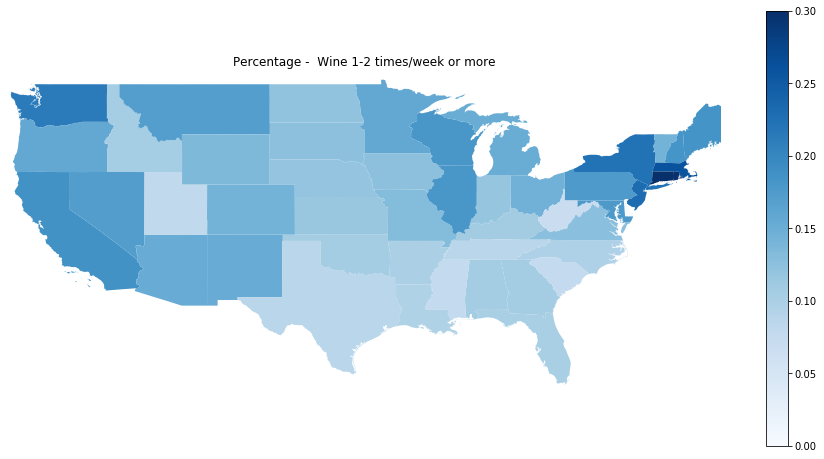

In [10]:
fig, ax = plt.subplots(figsize=(16, 8))

Wine_merged_data.plot(column='Percentage', cmap='Blues', ax=ax)
ax.set_xlim([-125, -68])
ax.set_ylim([25,50])

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=.3))
cbar = fig.colorbar(sm)
ax.set(title='Percentage -  Wine 1-2 times/week or more')

ax.set_axis_off()
plt.show()

/home/illuminator/anaconda3/envs/geo-env/lib/python3.8/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


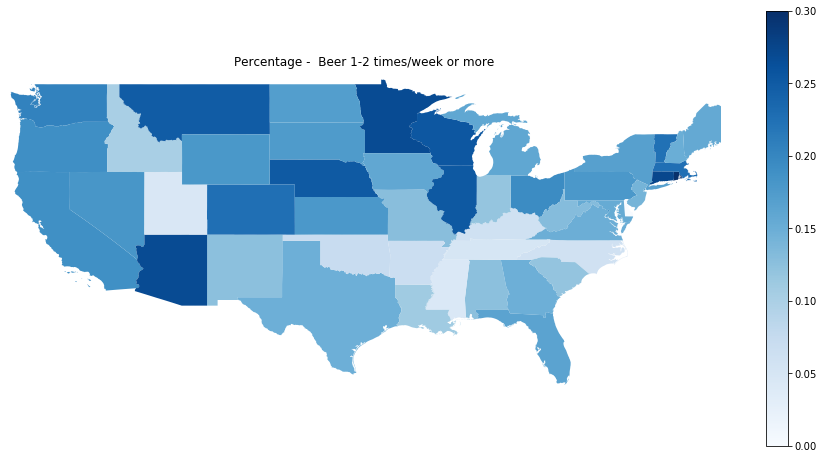

In [14]:
fig, ax = plt.subplots(figsize=(16, 8))

Beer_merged_data.plot(column='Percentage', cmap='Blues', ax=ax)
ax.set_xlim([-125, -68])
ax.set_ylim([25,50])

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=.3))
cbar = fig.colorbar(sm)

ax.set(title='Percentage -  Beer 1-2 times/week or more')

ax.set_axis_off()
plt.show()

/home/illuminator/anaconda3/envs/geo-env/lib/python3.8/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


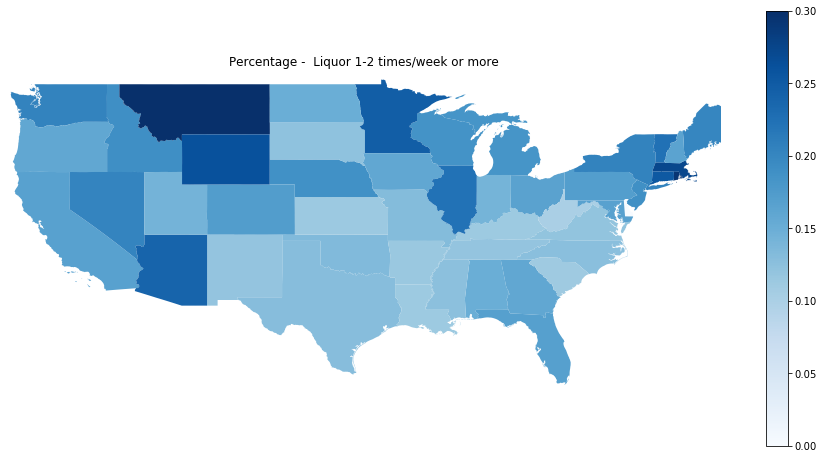

In [15]:
fig, ax = plt.subplots(figsize=(16, 8))

Liquor_merged_data.plot(column='Percentage', cmap='Blues', ax=ax)
ax.set_xlim([-125, -68])
ax.set_ylim([25,50])

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=.3))
cbar = fig.colorbar(sm)

ax.set(title='Percentage -  Liquor 1-2 times/week or more')

ax.set_axis_off()
plt.show()

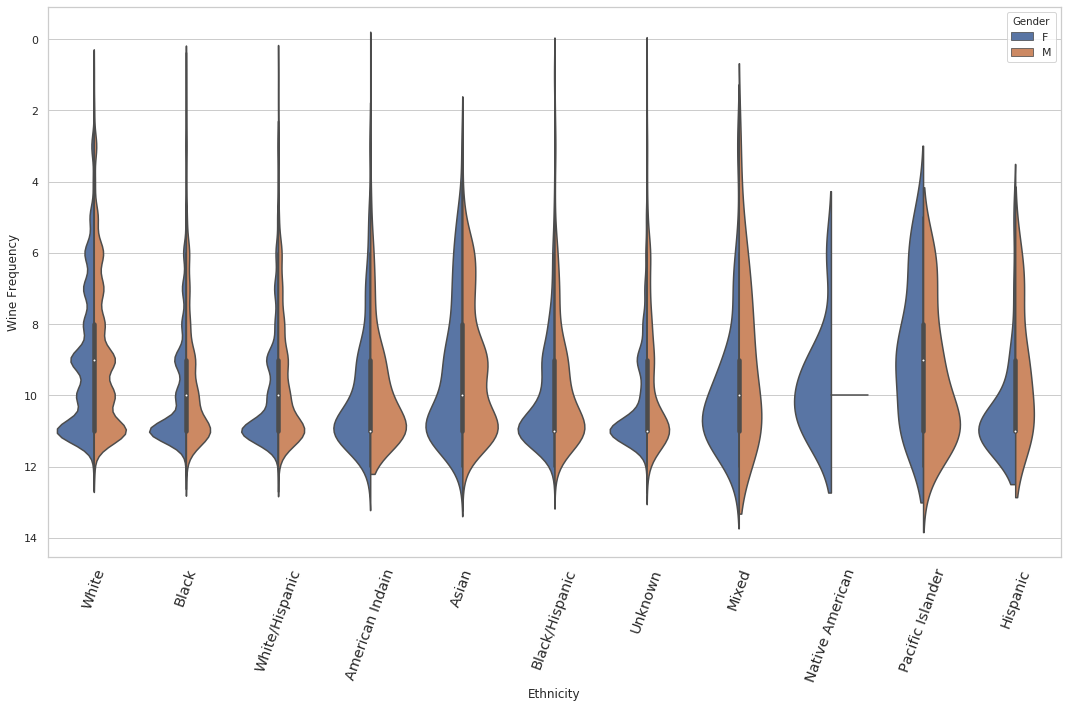

In [91]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
ax = sns.violinplot(y="Wine Frequency", x="Ethnicity",  hue='Gender', split=True,
                     data=final_df)
ax.invert_yaxis()
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, fontsize='large');

plt.tight_layout()
plt.savefig('Ethnicity_Wine2')

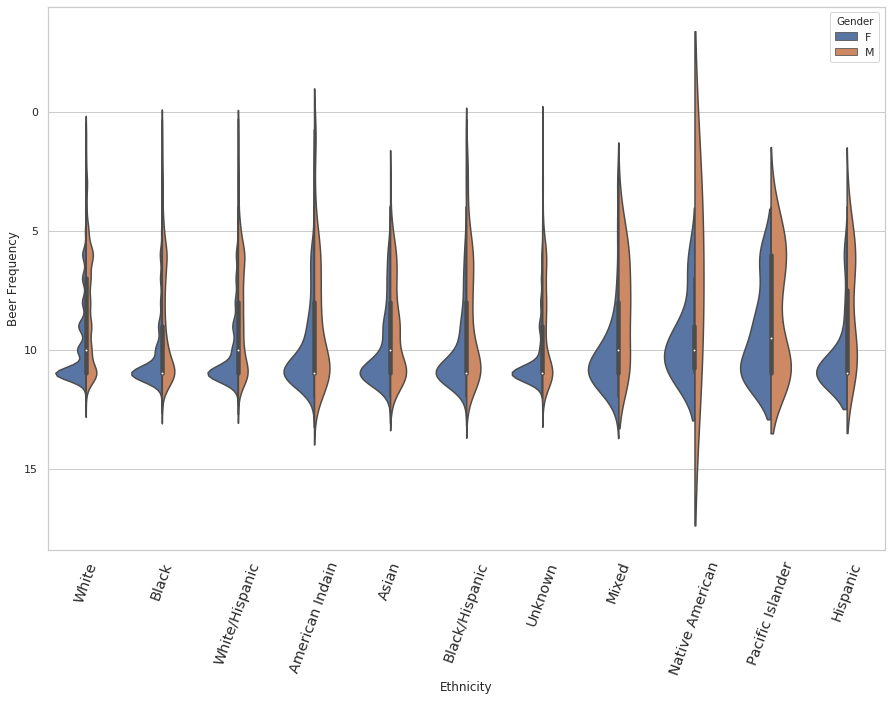

In [17]:
plt.figure(figsize=(15,10))
ax = sns.violinplot(y="Beer Frequency", x="Ethnicity", hue='Gender', split=True,
                     data=final_df)
ax.invert_yaxis()
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, fontsize='large');

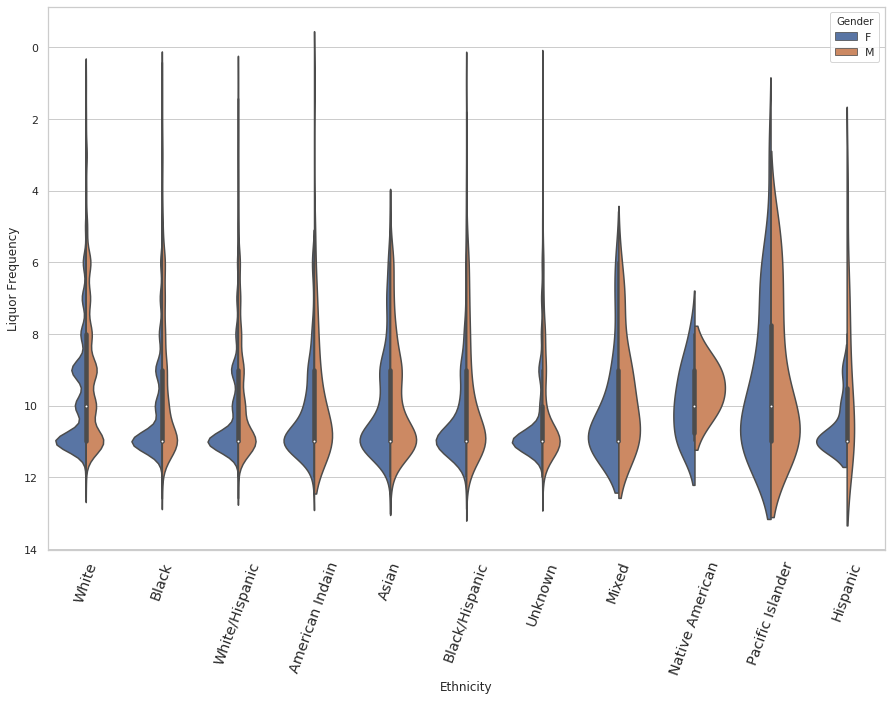

In [94]:
plt.figure(figsize=(15,10))
ax = sns.violinplot(y="Liquor Frequency", x="Ethnicity", hue='Gender', split=True,
                     data=final_df)
ax.invert_yaxis()
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, fontsize='large');


In [110]:
#change string values within age column to numeric data
final_df['Age'] = final_df['Age'].map(lambda x: 75.0 if x == '75+' else x)
final_df['Age'] = final_df['Age'].map(lambda x: -1 if x == 'Unknown' else x)


In [111]:
#cast df as new float object because previous df had strings in it
final_df['Age'] = final_df['Age'].astype('float64')

In [28]:
final_df.groupby('Average Drinking')['Average Drinking'].count()

Average Drinking
1.0      189
2.0      250
3.0      932
4.0      460
5.0     1787
6.0     3495
7.0     2880
8.0     2367
9.0     4319
10.0    3106
11.0    8026
12.0      97
Name: Average Drinking, dtype: int64

In [120]:
#filter out Average Drinking values over 11
filter_12 = final_df[final_df['Average Drinking']<12]

In [121]:
filter_12.groupby('Average Drinking')['Average Drinking'].count()

Average Drinking
1.0      189
2.0      250
3.0      932
4.0      460
5.0     1787
6.0     3495
7.0     2880
8.0     2367
9.0     4319
10.0    3106
11.0    8026
Name: Average Drinking, dtype: int64

In [123]:
#create filtered dfs by age 
young_mask = filter_12[filter_12['Age'] <= 30]
old_mask = filter_12[filter_12['Age'] > 30]

In [125]:
young_mask.groupby('Average Drinking')['Average Drinking'].count()

Average Drinking
1.0       37
2.0       37
3.0      106
4.0       94
5.0      426
6.0      901
7.0      767
8.0      569
9.0      870
10.0     579
11.0    1576
Name: Average Drinking, dtype: int64

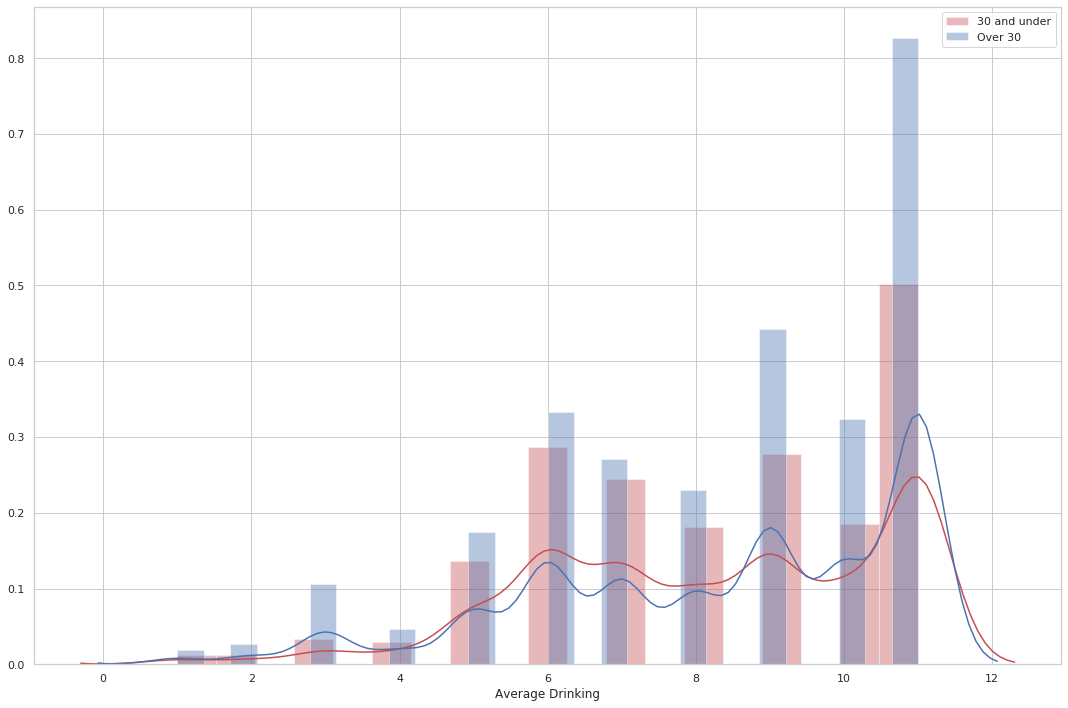

In [126]:
plt.figure(figsize=(15,10))
ax = sns.distplot(young_mask['Average Drinking'], color='r', label="30 and under")
ax = sns.distplot(old_mask['Average Drinking'], label='Over 30')
plt.legend()
plt.tight_layout()
plt.savefig('Age_Comparison')

In [127]:
#Function to calculate Mann-Whitney Statistic
def count_winning_pairs(sample_1, sample_2):
    sample_1, sample_2 = np.array(sample_1), np.array(sample_2)
    n_total_wins = 0
    for x in sample_1:
        n_wins = np.sum(x > sample_2) + 0.5*np.sum(x == sample_2)
        n_total_wins += n_wins
    return n_total_wins

In [135]:
#DO NOT UNCOMMENT! returned values are assigned to variables below
#assigns variables with Mann-Whitney statistic
'''
Under_30_loses = count_winning_pairs(young_mask['Average Drinking'], old_mask['Average Drinking'])
Over_30_loses = count_winning_pairs(old_mask['Average Drinking'], young_mask['Average Drinking'])
'''
Old_wins = 77714902.0
Young_wins = 88913958.0

print(Old_wins / (Old_wins + Young_wins))
print(Young_wins / (Old_wins + Young_wins))

0.4663952090892298
0.5336047909107702


In [128]:
young_mask.groupby('Average Drinking')['Average Drinking'].count()

Average Drinking
1.0       37
2.0       37
3.0      106
4.0       94
5.0      426
6.0      901
7.0      767
8.0      569
9.0      870
10.0     579
11.0    1576
Name: Average Drinking, dtype: int64

In [129]:
#calculate p-value with Mann-Whitney U-Test 
res = stats.mannwhitneyu(young_mask['Average Drinking'], old_mask['Average Drinking'], alternative='less')
print(res)

MannwhitneyuResult(statistic=62097289.5, pvalue=9.72447915670494e-09)


In [130]:
#function to create an array of number counts per age group for chi2
def count_values(column):
    list1=[]
    for num in np.unique(column['Average Drinking']):
        list1.append(column[column['Average Drinking'] == num].count()[0])
    return np.array(list1)

In [131]:
#assign arrays from count_values function using dfs filtered by age
old_array = count_values(old_mask)
young_array = count_values(young_mask)

#create completed count array for chi2 function
final_array = np.array([young_array, old_array])

In [133]:
#print chi squared statistics
chi2,pval,dof,exp_array = scs.chi2_contingency(final_array)
print("Chi2 Value: {0}\np-value: {1}\ndof: {2}\nExpected Value Array:\n{3}".format(chi2,pval,dof,exp_array))

Chi2 Value: 198.32461645571908
p-value: 3.6076627195573985e-37
dof: 10
Expected Value Array:
[[  40.51698968   53.59390169  199.79806551   98.61277912  383.08920931
   749.24274568  617.40174751  507.42706123  925.88824566  665.85063464
  1720.57861997]
 [ 148.48301032  196.40609831  732.20193449  361.38722088 1403.91079069
  2745.75725432 2262.59825249 1859.57293877 3393.11175434 2440.14936536
  6305.42138003]]


In [85]:
chisquare(final_array, f_exp=exp_array, axis=1)

Power_divergenceResult(statistic=array([191.36072447,  48.5361097 ]), pvalue=array([4.59287106e-35, 1.14532975e-06]))

In [86]:
test_stat = np.sum((final_array-exp_array)**2/exp_array)

In [87]:
1 - stats.chi2(df=10).cdf(test_stat)

0.0